In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('auto-mpg.csv')

In [2]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


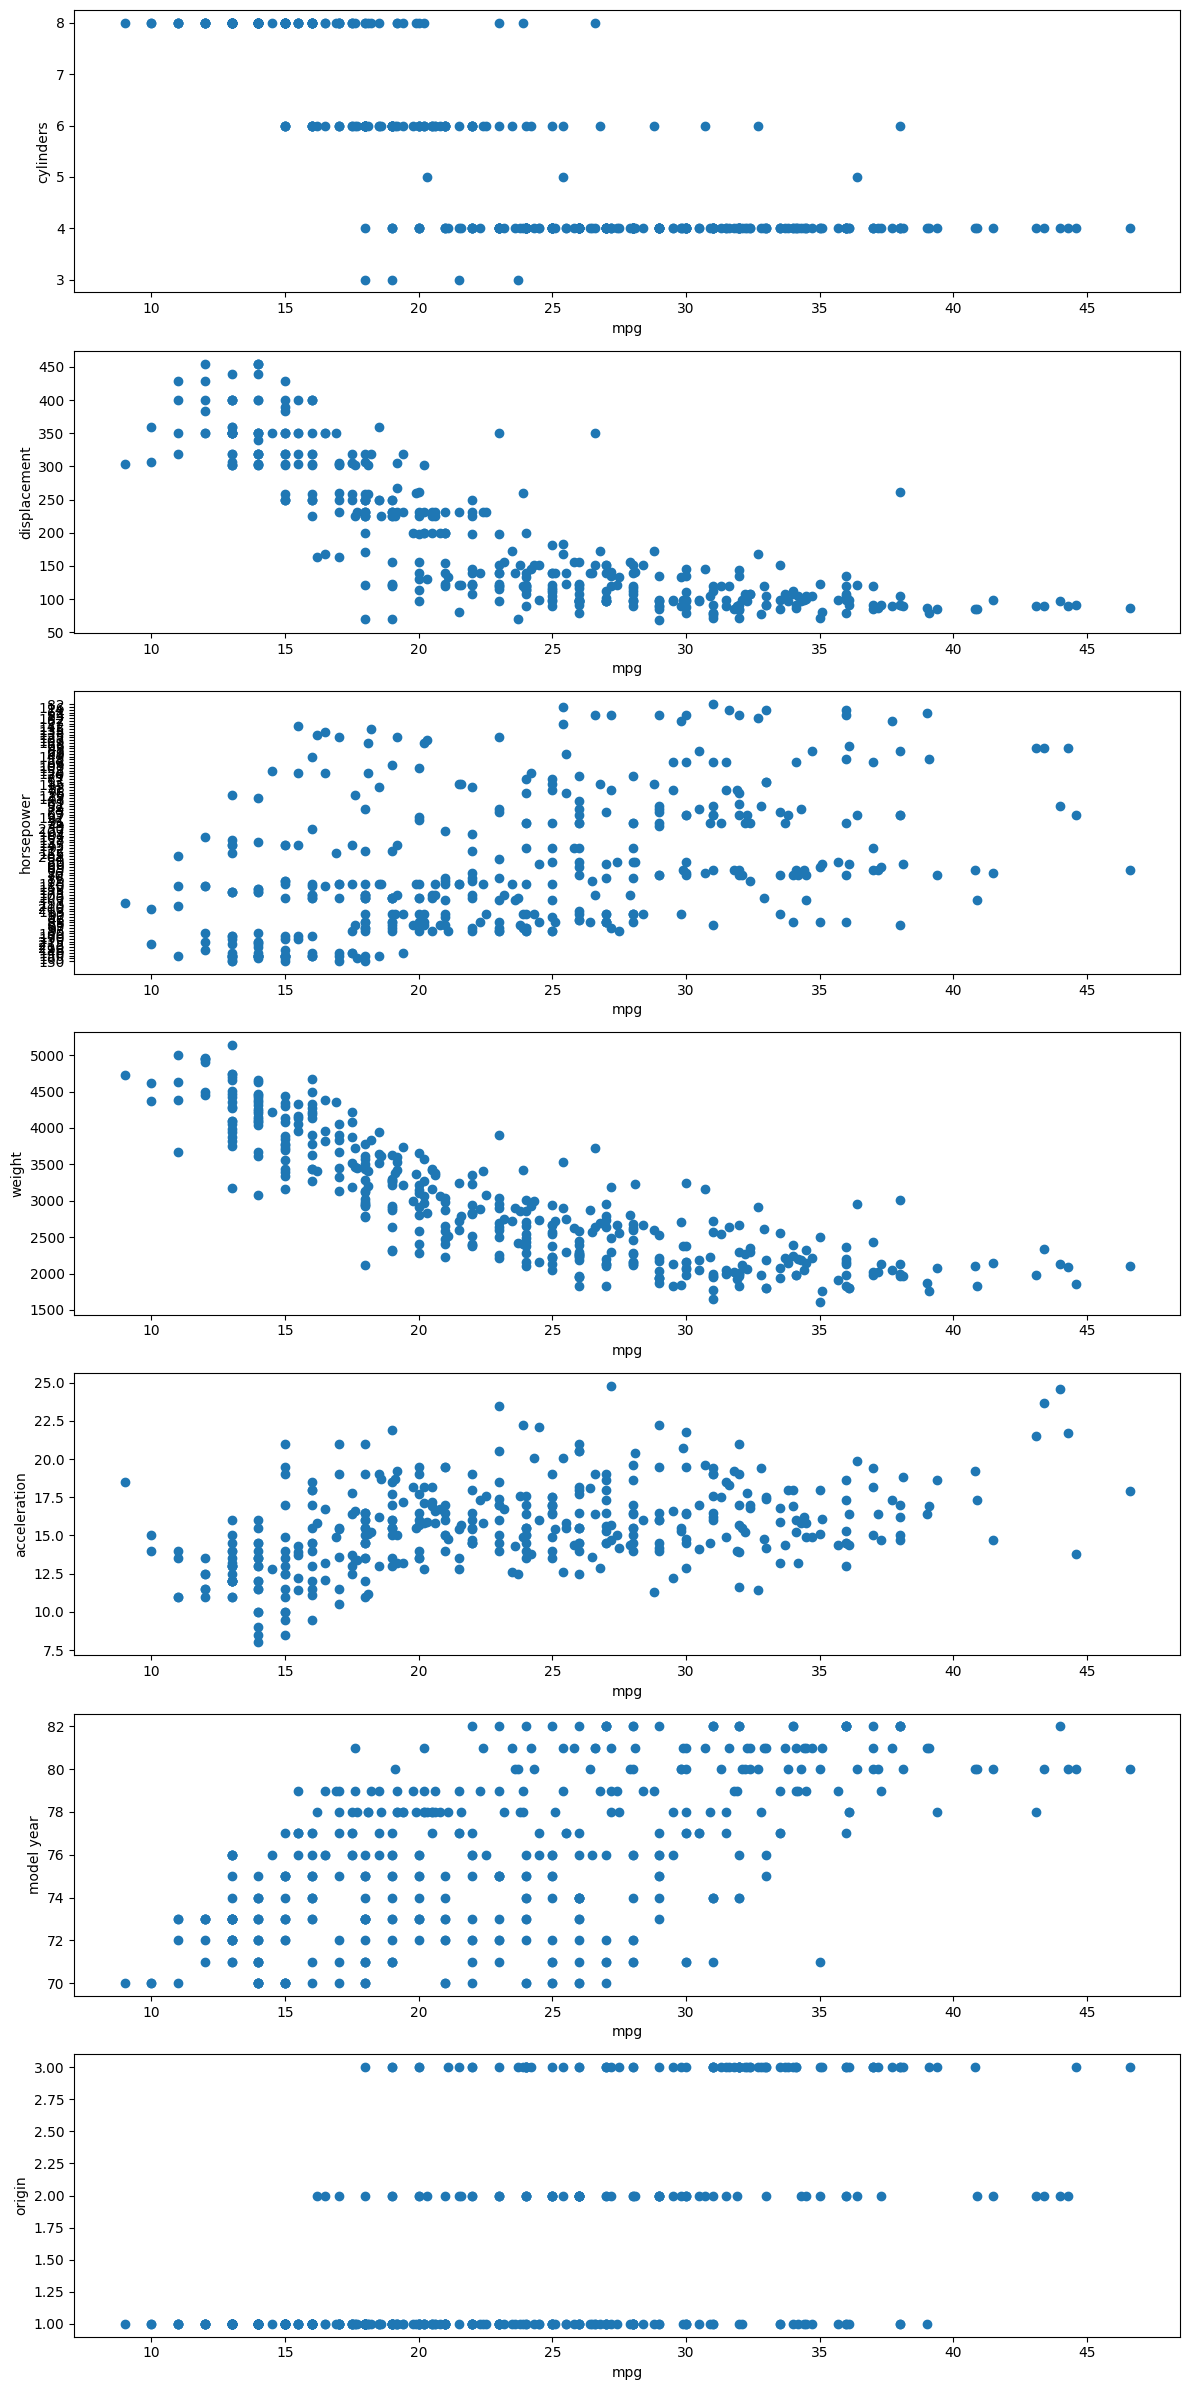

In [3]:
fig, ax = plt.subplots(7,1,figsize=(12,24))
ax[0].scatter(data['mpg'],data['cylinders'])
ax[0].set_xlabel('mpg')
ax[0].set_ylabel('cylinders')
ax[1].scatter(data['mpg'],data['displacement'])
ax[1].set_xlabel('mpg')
ax[1].set_ylabel('displacement')
ax[2].scatter(data['mpg'],data['horsepower'])
ax[2].set_xlabel('mpg')
ax[2].set_ylabel('horsepower')
ax[3].scatter(data['mpg'],data['weight'])
ax[3].set_xlabel('mpg')
ax[3].set_ylabel('weight')
ax[4].scatter(data['mpg'],data['acceleration'])
ax[4].set_xlabel('mpg')
ax[4].set_ylabel('acceleration')
ax[5].scatter(data['mpg'],data['model year'])
ax[5].set_xlabel('mpg')
ax[5].set_ylabel('model year')
ax[6].scatter(data['mpg'],data['origin'])
ax[6].set_xlabel('mpg')
ax[6].set_ylabel('origin')
plt.tight_layout()
plt.show()

In [4]:
#removing irrelevant 'car name' column
data.drop('car name',axis=1,inplace=True)
#converting all columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors ='coerce')
#replacing missing values in horsepower with its median
horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)

In [5]:
data['cylinders_norm'] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()
data['displacement_norm'] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()
data['horsepower_norm'] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()
data['weight_norm'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()
data['acceleration_norm'] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()
data['model_year_norm'] = (data['model year'] - data['model year'].mean()) / data['model year'].std()
data['origin_norm'] = (data['origin'] - data['origin'].mean()) / data['origin'].std()

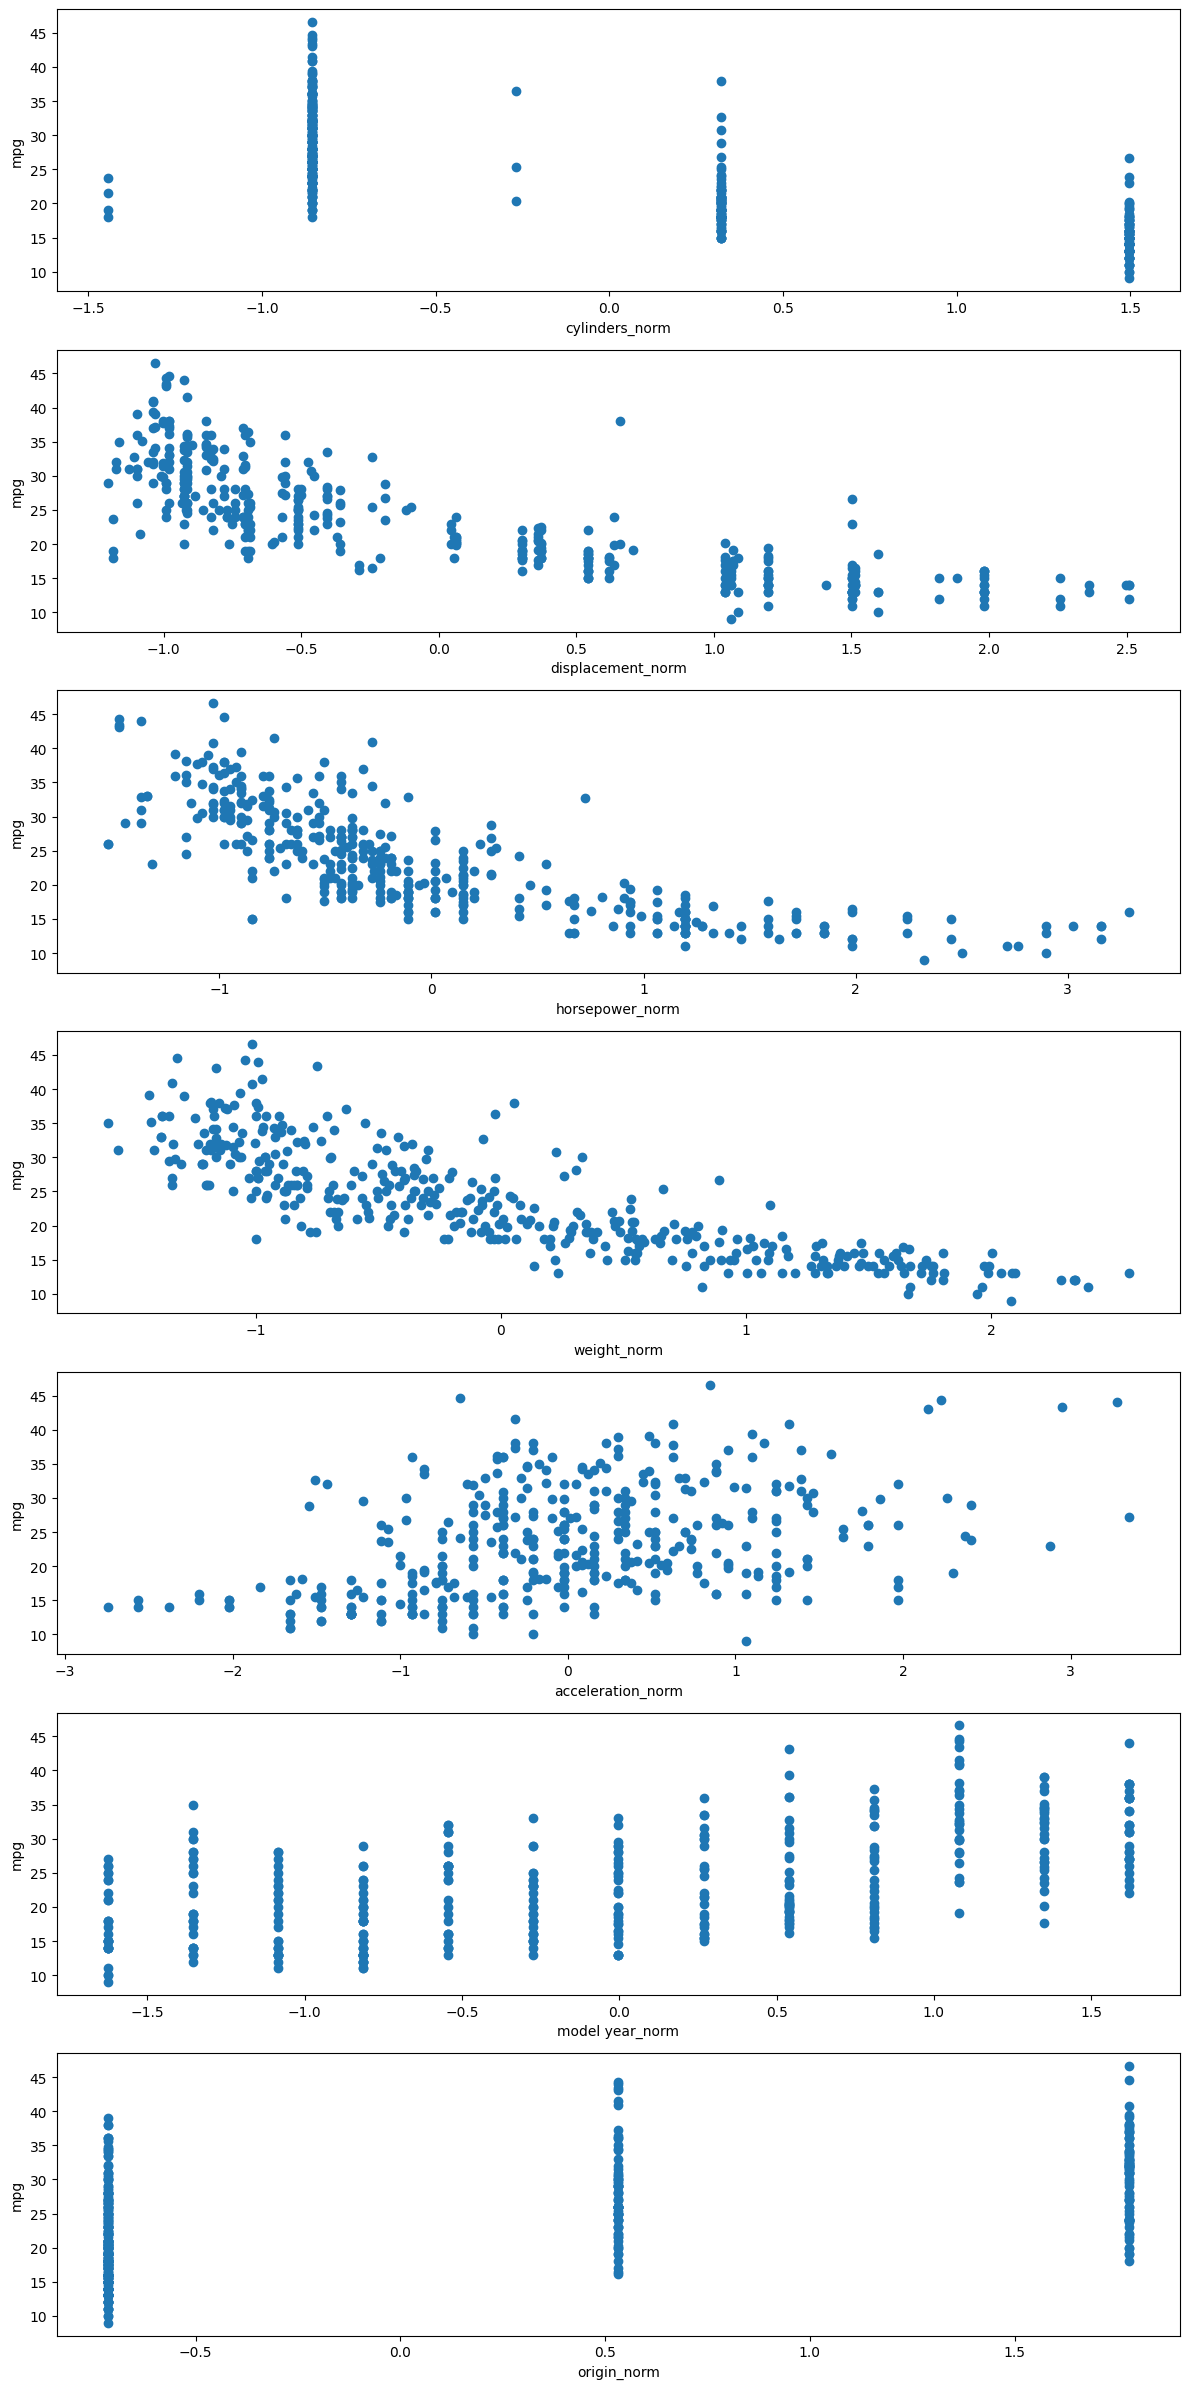

In [6]:
fig, ax = plt.subplots(7,1,figsize=(12,24))
ax[0].scatter(data['cylinders_norm'], data['mpg'])
ax[0].set_xlabel('cylinders_norm')
ax[0].set_ylabel('mpg')
ax[1].scatter(data['displacement_norm'], data['mpg'])
ax[1].set_xlabel('displacement_norm')
ax[1].set_ylabel('mpg')
ax[2].scatter(data['horsepower_norm'], data['mpg'])
ax[2].set_xlabel('horsepower_norm')
ax[2].set_ylabel('mpg')
ax[3].scatter(data['weight_norm'], data['mpg'])
ax[3].set_xlabel('weight_norm')
ax[3].set_ylabel('mpg')
ax[4].scatter(data['acceleration_norm'], data['mpg'])
ax[4].set_xlabel('acceleration_norm')
ax[4].set_ylabel('mpg')
ax[5].scatter(data['model_year_norm'], data['mpg'])
ax[5].set_xlabel('model year_norm')
ax[5].set_ylabel('mpg')
ax[6].scatter(data['origin_norm'], data['mpg'])
ax[6].set_xlabel('origin_norm')
ax[6].set_ylabel('mpg')
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        14:10:19   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.5146      0.16

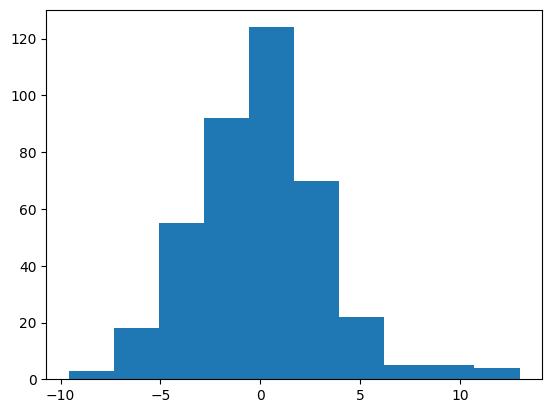

In [17]:
import numpy as np
import statsmodels.formula.api as smf

model = smf.ols(formula='mpg ~ cylinders_norm + displacement_norm + horsepower_norm + weight_norm + acceleration_norm + model_year_norm + origin_norm', data=data)
results = model.fit()
print(results.summary())

data['residuals'] = results.resid
plt.hist(data['residuals'])
print('Mean Residual = ',np.mean(data['residuals']))
print('Std Residual = ',np.std(data['residuals']))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     587.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          4.96e-145
Time:                        14:10:52   Log-Likelihood:                -1044.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     394   BIC:                             2112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          23.5146      0.168    1

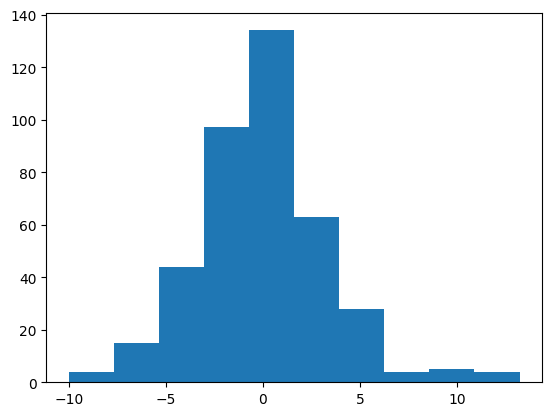

In [18]:
model2 = smf.ols(formula='mpg ~ weight_norm + model_year_norm + origin_norm', data=data)
results2 = model2.fit()
print(results2.summary())

data['residuals2'] = results2.resid
plt.hist(data['residuals2'])
print('Mean Residual 2 = ',np.mean(data['residuals2']))
print('Std Residual 2 = ',np.std(data['residuals2']))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        14:11:24   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

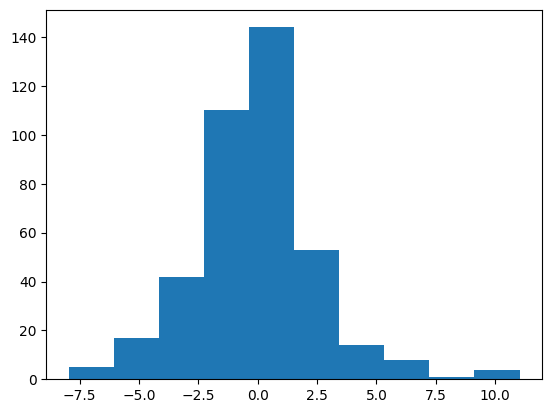

In [19]:
model3 = smf.ols(formula='mpg ~ cylinders_norm + displacement_norm + horsepower_norm + weight_norm + acceleration_norm + model_year_norm + origin_norm + cylinders_norm*displacement_norm + cylinders_norm*horsepower_norm +cylinders_norm*weight_norm + cylinders_norm*weight_norm + cylinders_norm*acceleration_norm + cylinders_norm*model_year_norm + cylinders_norm*origin_norm + displacement_norm*horsepower_norm + displacement_norm*weight_norm + displacement_norm*acceleration_norm +displacement_norm*model_year_norm + displacement_norm*origin_norm +horsepower_norm*weight_norm + horsepower_norm*acceleration_norm + horsepower_norm*model_year_norm + horsepower_norm*origin_norm + weight_norm*acceleration_norm + weight_norm*model_year_norm + weight_norm*origin_norm + acceleration_norm*model_year_norm + acceleration_norm*origin_norm + model_year_norm*origin_norm', data=data)
results3 = model3.fit()
print(results3.summary())

data['residuals3'] = results3.resid
plt.hist(data['residuals3'])
print('Mean Residual 3 = ',np.mean(data['residuals3']))
print('Std Residual 3 = ',np.std(data['residuals3']))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     217.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          5.34e-168
Time:                        14:12:19   Log-Likelihood:                -959.92
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     384   BIC:                             2004.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

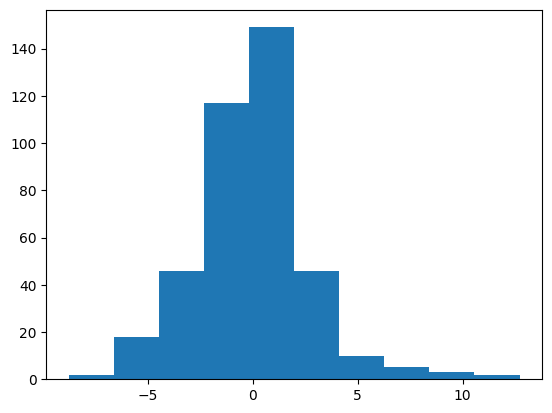

In [21]:
model4 = smf.ols(formula='mpg ~ horsepower_norm + weight_norm + model_year_norm + cylinders_norm*acceleration_norm + displacement_norm*weight_norm + horsepower_norm*acceleration_norm + acceleration_norm*model_year_norm + acceleration_norm*origin_norm + model_year_norm*origin_norm', data=data)
results4 = model4.fit()
print(results4.summary())

data['residuals4'] = results4.resid
plt.hist(data['residuals4'])
print('Mean Residual 4 = ',np.mean(data['residuals4']))
print('Std Residual 4 = ',np.std(data['residuals4']))

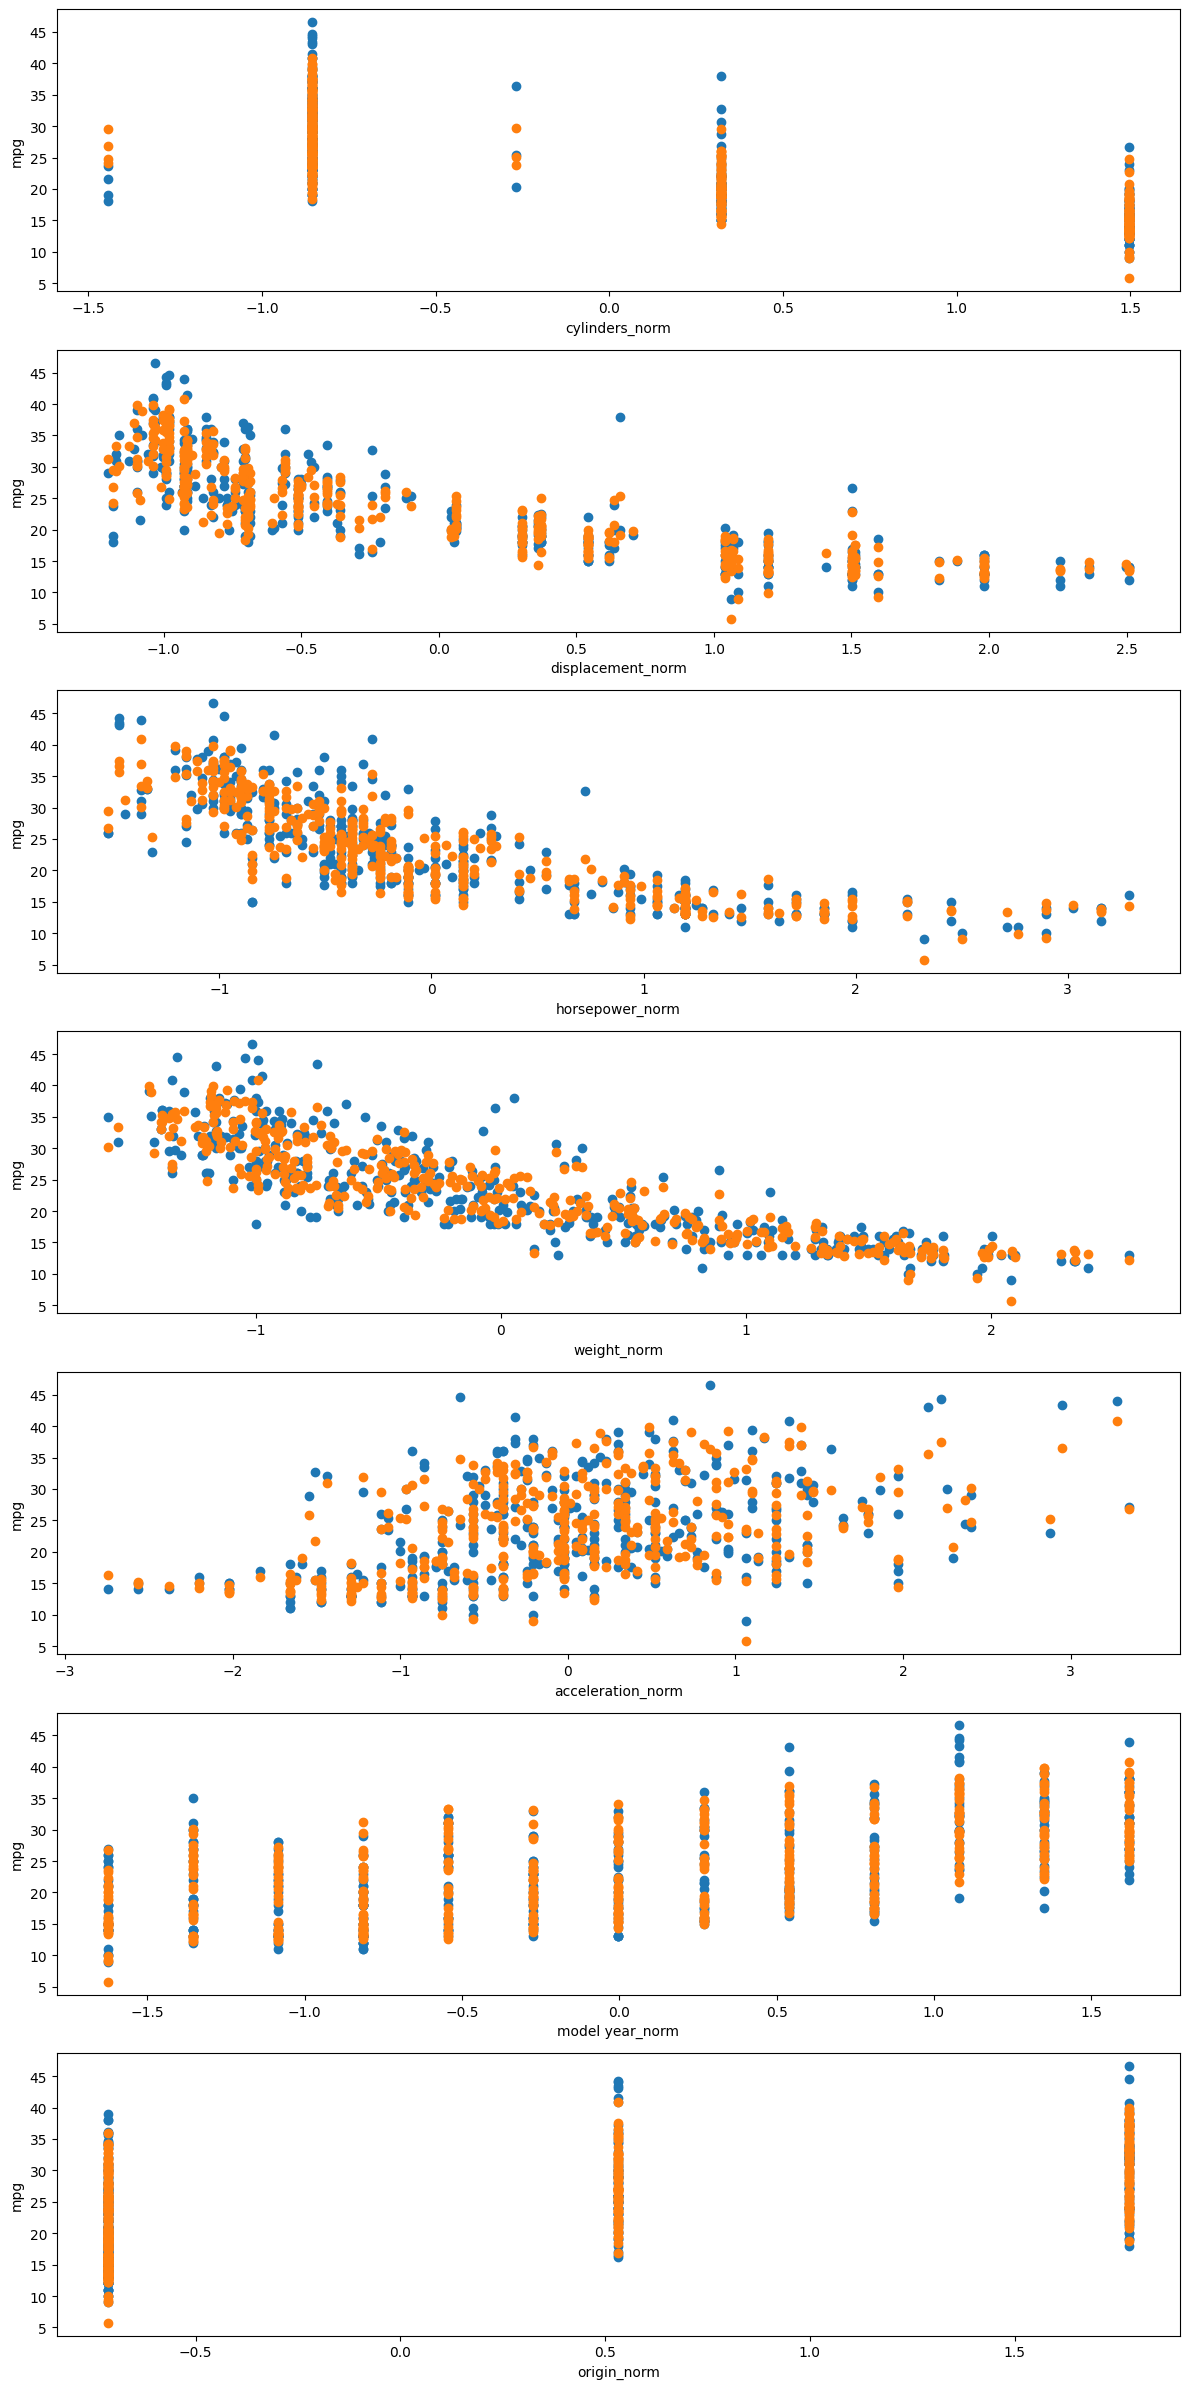

In [24]:
data['mpg_pred'] = results4.predict(data)

fig, ax = plt.subplots(7,1,figsize=(12,24))
ax[0].scatter(data['cylinders_norm'], data['mpg'])
ax[0].scatter(data['cylinders_norm'], data['mpg_pred'])
ax[0].set_xlabel('cylinders_norm')
ax[0].set_ylabel('mpg')
ax[1].scatter(data['displacement_norm'], data['mpg'])
ax[1].scatter(data['displacement_norm'], data['mpg_pred'])
ax[1].set_xlabel('displacement_norm')
ax[1].set_ylabel('mpg')
ax[2].scatter(data['horsepower_norm'], data['mpg'])
ax[2].scatter(data['horsepower_norm'], data['mpg_pred'])
ax[2].set_xlabel('horsepower_norm')
ax[2].set_ylabel('mpg')
ax[3].scatter(data['weight_norm'], data['mpg'])
ax[3].scatter(data['weight_norm'], data['mpg_pred'])
ax[3].set_xlabel('weight_norm')
ax[3].set_ylabel('mpg')
ax[4].scatter(data['acceleration_norm'], data['mpg'])
ax[4].scatter(data['acceleration_norm'], data['mpg_pred'])
ax[4].set_xlabel('acceleration_norm')
ax[4].set_ylabel('mpg')
ax[5].scatter(data['model_year_norm'], data['mpg'])
ax[5].scatter(data['model_year_norm'], data['mpg_pred'])
ax[5].set_xlabel('model year_norm')
ax[5].set_ylabel('mpg')
ax[6].scatter(data['origin_norm'], data['mpg'])
ax[6].scatter(data['origin_norm'], data['mpg_pred'])
ax[6].set_xlabel('origin_norm')
ax[6].set_ylabel('mpg')
plt.tight_layout()
plt.show()